In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
df = pd.read_csv("Ames_Housing_Data1.tsv", sep='\t')
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      1  526301100           20        RL         141.0     31770   Pave   
2      2  526350040           20        RH          80.0     11622   Pave   
3      3  526351010           20        RL          81.0     14267   Pave   
4      4  526353030           20        RL          93.0     11160   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
2   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
4   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       5    2010       WD           Normal     215000  
2        0       6    2010       WD           Normal     105000  
3    12500       6    2010       WD           Normal     172000  
4        0       4    2010       WD           Normal     244000  

[5 rows x 82 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [5]:
df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy()

Number of rows in the data: 2926
Number of columns in the data: 82


In [6]:
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      1  526301100           20        RL         141.0     31770   Pave   
2      2  526350040           20        RH          80.0     11622   Pave   
3      3  526351010           20        RL          81.0     14267   Pave   
4      4  526353030           20        RL          93.0     11160   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
2   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
4   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       5    2010       WD           Normal     215000  
2        0       6    2010       WD           Normal     105000  
3    12500       6    2010       WD           Normal     172000  
4        0       4    2010       WD           Normal     244000  

[5 rows x 82 columns]

In [7]:
one_hot_encode_cols = df.dtypes[df.dtypes == object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

In [8]:
df[one_hot_encode_cols].head().T

0        1        2        3        4
MS Zoning            RL       RL       RH       RL       RL
Street             Pave     Pave     Pave     Pave     Pave
Alley               NaN      NaN      NaN      NaN      NaN
Lot Shape           IR1      IR1      Reg      IR1      Reg
Land Contour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities        AllPub   AllPub   AllPub   AllPub   AllPub
Lot Config       Corner   Corner   Inside   Corner   Corner
Land Slope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood      NAmes    NAmes    NAmes    NAmes    NAmes
Condition 1        Norm     Norm    Feedr     Norm     Norm
Condition 2        Norm     Norm     Norm     Norm     Norm
Bldg Type          1Fam     1Fam     1Fam     1Fam     1Fam
House Style      1Story   1Story   1Story   1Story   1Story
Roof Style          Hip      Hip    Gable      Hip      Hip
Roof Matl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior 1st    BrkFace  BrkFace  VinylSd  Wd Sdng  BrkFace
Exterior 2nd    Plywood  Plywood  VinylSd  Wd Sdng  BrkFace
Mas Vnr Type      Stone    Stone      NaN  BrkFace      NaN
Exter Qual           TA       TA       TA       TA       Gd
Exter Cond           TA       TA       TA       TA       TA
Foundation       CBlock   CBlock   CBlock   CBlock   CBlock
Bsmt Qual            TA       TA       TA       TA       TA
Bsmt Cond            Gd       Gd       TA       TA       TA
Bsmt Exposure        Gd       Gd       No       No       No
BsmtFin Type 1      BLQ      BLQ      Rec      ALQ      ALQ
BsmtFin Type 2      Unf      Unf      LwQ      Unf      Unf
Heating            GasA     GasA     GasA     GasA     GasA
Heating QC           Fa       Fa       TA       TA       Ex
Central Air           Y        Y        Y        Y        Y
Electrical        SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
Kitchen Qual         TA       TA       TA       Gd       Ex
Functional          Typ      Typ      Typ      Typ      Typ
Fireplace Qu         Gd       Gd      NaN      NaN       TA
Garage Type      Attchd   Attchd   Attchd   Attchd   Attchd
Garage Finish       Fin      Fin      Unf      Unf      Fin
Garage Qual          TA       TA       TA       TA       TA
Garage Cond          TA       TA       TA       TA       TA
Paved Drive           P        P        Y        Y        Y
Pool QC             NaN      NaN      NaN      NaN      NaN
Fence               NaN      NaN    MnPrv      NaN      NaN
Misc Feature        NaN      NaN      NaN     Gar2      NaN
Sale Type           WD       WD       WD       WD       WD 
Sale Condition   Normal   Normal   Normal   Normal   Normal

In [9]:
df = pd.get_dummies(df, columns= one_hot_encode_cols, drop_first= True)
df.describe().T

count          mean           std          min  \
Order            2926.0  1.464294e+03  8.467295e+02          1.0   
PID              2926.0  7.143288e+08  1.887272e+08  526301100.0   
MS SubClass      2926.0  5.738380e+01  4.266706e+01         20.0   
Lot Frontage     2436.0  6.905337e+01  2.275304e+01         21.0   
Lot Area         2926.0  1.011099e+04  7.790972e+03       1300.0   
Overall Qual     2926.0  6.088175e+00  1.402714e+00          1.0   
Overall Cond     2926.0  5.563568e+00  1.112121e+00          1.0   
Year Built       2926.0  1.971299e+03  3.023803e+01       1872.0   
Year Remod/Add   2926.0  1.984226e+03  2.086302e+01       1950.0   
Mas Vnr Area     2903.0  1.007144e+02  1.760041e+02          0.0   
BsmtFin SF 1     2925.0  4.381662e+02  4.379731e+02          0.0   
BsmtFin SF 2     2925.0  4.979043e+01  1.692741e+02          0.0   
Bsmt Unf SF      2925.0  5.589070e+02  4.395516e+02          0.0   
Total Bsmt SF    2925.0  1.046864e+03  4.210380e+02          0.0   
1st Flr SF       2926.0  1.155632e+03  3.766413e+02        334.0   
2nd Flr SF       2926.0  3.337187e+02  4.258139e+02          0.0   
Low Qual Fin SF  2926.0  4.683185e+00  4.634184e+01          0.0   
Gr Liv Area      2926.0  1.494034e+03  4.861997e+02        334.0   
Bsmt Full Bath   2924.0  4.305746e-01  5.241048e-01          0.0   
Bsmt Half Bath   2924.0  6.053352e-02  2.441835e-01          0.0   
Full Bath        2926.0  1.564593e+00  5.513904e-01          0.0   
Half Bath        2926.0  3.783322e-01  5.023658e-01          0.0   
Bedroom AbvGr    2926.0  2.853725e+00  8.275996e-01          0.0   
Kitchen AbvGr    2926.0  1.044429e+00  2.142163e-01          0.0   
TotRms AbvGrd    2926.0  6.434381e+00  1.557656e+00          2.0   
Fireplaces       2926.0  5.974026e-01  6.457594e-01          0.0   
Garage Yr Blt    2767.0  1.978082e+03  2.552657e+01       1895.0   
Garage Cars      2925.0  1.765128e+00  7.597166e-01          0.0   
Garage Area      2925.0  4.719029e+02  2.137820e+02          0.0   
Wood Deck SF     2926.0  9.343199e+01  1.260310e+02          0.0   
Open Porch SF    2926.0  4.717191e+01  6.656099e+01          0.0   
Enclosed Porch   2926.0  2.304306e+01  6.417725e+01          0.0   
3Ssn Porch       2926.0  2.596036e+00  2.515833e+01          0.0   
Screen Porch     2926.0  1.602392e+01  5.612258e+01          0.0   
Pool Area        2926.0  1.892686e+00  3.295865e+01          0.0   
Misc Val         2926.0  4.489440e+01  4.721580e+02          0.0   
Mo Sold          2926.0  6.216336e+00  2.711171e+00          1.0   
Yr Sold          2926.0  2.007792e+03  1.317815e+00       2006.0   
SalePrice        2926.0  1.804234e+05  7.854403e+04      12789.0   

                          25%          50%           75%           max  
Order            7.312500e+02       1462.5  2.198750e+03  2.930000e+03  
PID              5.284770e+08  535453205.0  9.071801e+08  1.007100e+09  
MS SubClass      2.000000e+01         50.0  7.000000e+01  1.900000e+02  
Lot Frontage     5.800000e+01         68.0  8.000000e+01  3.130000e+02  
Lot Area         7.438500e+03       9429.0  1.151875e+04  2.152450e+05  
Overall Qual     5.000000e+00          6.0  7.000000e+00  1.000000e+01  
Overall Cond     5.000000e+00          5.0  6.000000e+00  9.000000e+00  
Year Built       1.954000e+03       1973.0  2.000750e+03  2.010000e+03  
Year Remod/Add   1.965000e+03       1993.0  2.004000e+03  2.010000e+03  
Mas Vnr Area     0.000000e+00          0.0  1.640000e+02  1.600000e+03  
BsmtFin SF 1     0.000000e+00        370.0  7.330000e+02  2.288000e+03  
BsmtFin SF 2     0.000000e+00          0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF      2.190000e+02        464.0  8.010000e+02  2.336000e+03  
Total Bsmt SF    7.930000e+02        990.0  1.299000e+03  3.206000e+03  
1st Flr SF       8.760000e+02       1082.5  1.383000e+03  3.820000e+03  
2nd Flr SF       0.000000e+00          0.0  7.020000e+02  1.862000e+03  
Low Qual Fin SF  0.000000e+00          0.0  0.000000e+00

In [10]:
mask = data.dtypes == float
float_cols = data.columns[mask]

skew_limit = 0.75
skew_vals = data[float_cols].skew()

In [11]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'skew'})
             .query('abs(skew) > {}'.format(skew_limit)))

skew_cols

skew
BsmtFin SF 2    4.136716
Bsmt Half Bath  3.966772
Mas Vnr Area    2.565828
Lot Frontage    1.113571
Bsmt Unf SF     0.925413
BsmtFin SF 1    0.821599

Text(0.5, 0.98, 'Field"BsmtFin SF 1"')

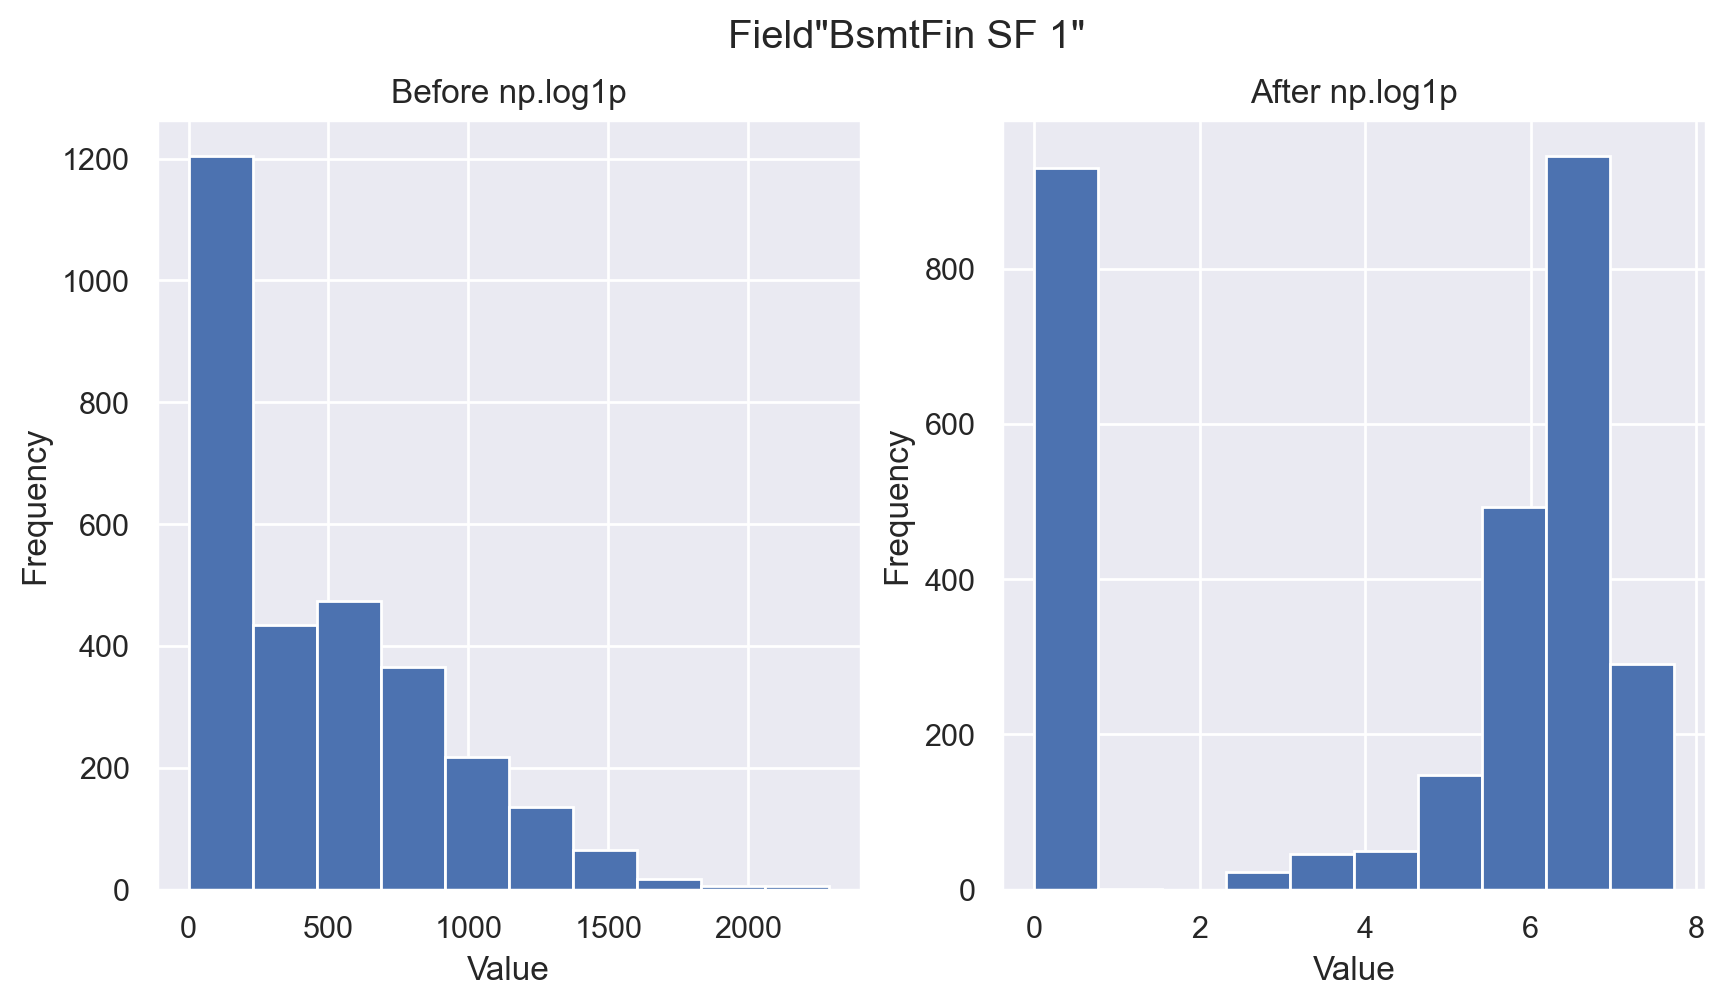

In [12]:
field = "BsmtFin SF 1"

fig, (ax_before, ax_after) = plt.subplots(1,2, figsize= (10,5))

df[field].hist(ax= ax_before)

df[field].apply(np.log1p).hist(ax= ax_after)

ax_before.set(title = 'Before np.log1p', ylabel = 'Frequency', xlabel = 'Value')
ax_after.set(title = 'After np.log1p', ylabel = 'Frequency', xlabel = 'Value')
fig.suptitle('Field"{}"'.format(field))


In [13]:
for cols in skew_cols.index.values:
    if cols == 'SalePrice':
        continue
    df[cols] = df[cols].apply(np.log1p)

In [14]:
df.shape

(2926, 261)

In [15]:
df = data
df.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Mas Vnr Type      1774
Fence             2355
Alley             2728
Misc Feature      2821
Pool QC           2915
Length: 82, dtype: int64

In [16]:
smaller_df = df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
                       'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                       'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                       'Garage Cars', 'SalePrice']]

smaller_df.describe().T

count           mean           std      min       25%  \
Lot Area        2926.0   10110.988380   7790.971797   1300.0    7438.5   
Overall Qual    2926.0       6.088175      1.402714      1.0       5.0   
Overall Cond    2926.0       5.563568      1.112121      1.0       5.0   
Year Built      2926.0    1971.299043     30.238026   1872.0    1954.0   
Year Remod/Add  2926.0    1984.225906     20.863018   1950.0    1965.0   
Gr Liv Area     2926.0    1494.034176    486.199741    334.0    1126.0   
Full Bath       2926.0       1.564593      0.551390      0.0       1.0   
Bedroom AbvGr   2926.0       2.853725      0.827600      0.0       2.0   
Fireplaces      2926.0       0.597403      0.645759      0.0       0.0   
Garage Cars     2925.0       1.765128      0.759717      0.0       1.0   
SalePrice       2926.0  180423.395762  78544.030820  12789.0  129500.0   

                     50%        75%       max  
Lot Area          9429.0   11518.75  215245.0  
Overall Qual         6.0       7.00      10.0  
Overall Cond         5.0       6.00       9.0  
Year Built        1973.0    2000.75    2010.0  
Year Remod/Add    1993.0    2004.00    2010.0  
Gr Liv Area       1441.5    1740.00    3820.0  
Full Bath            2.0       2.00       4.0  
Bedroom AbvGr        3.0       3.00       8.0  
Fireplaces           1.0       1.00       4.0  
Garage Cars          2.0       2.00       5.0  
SalePrice       160000.0  213500.00  625000.0

In [17]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2926 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.3 KB


In [18]:
smaller_df = smaller_df.fillna(0)

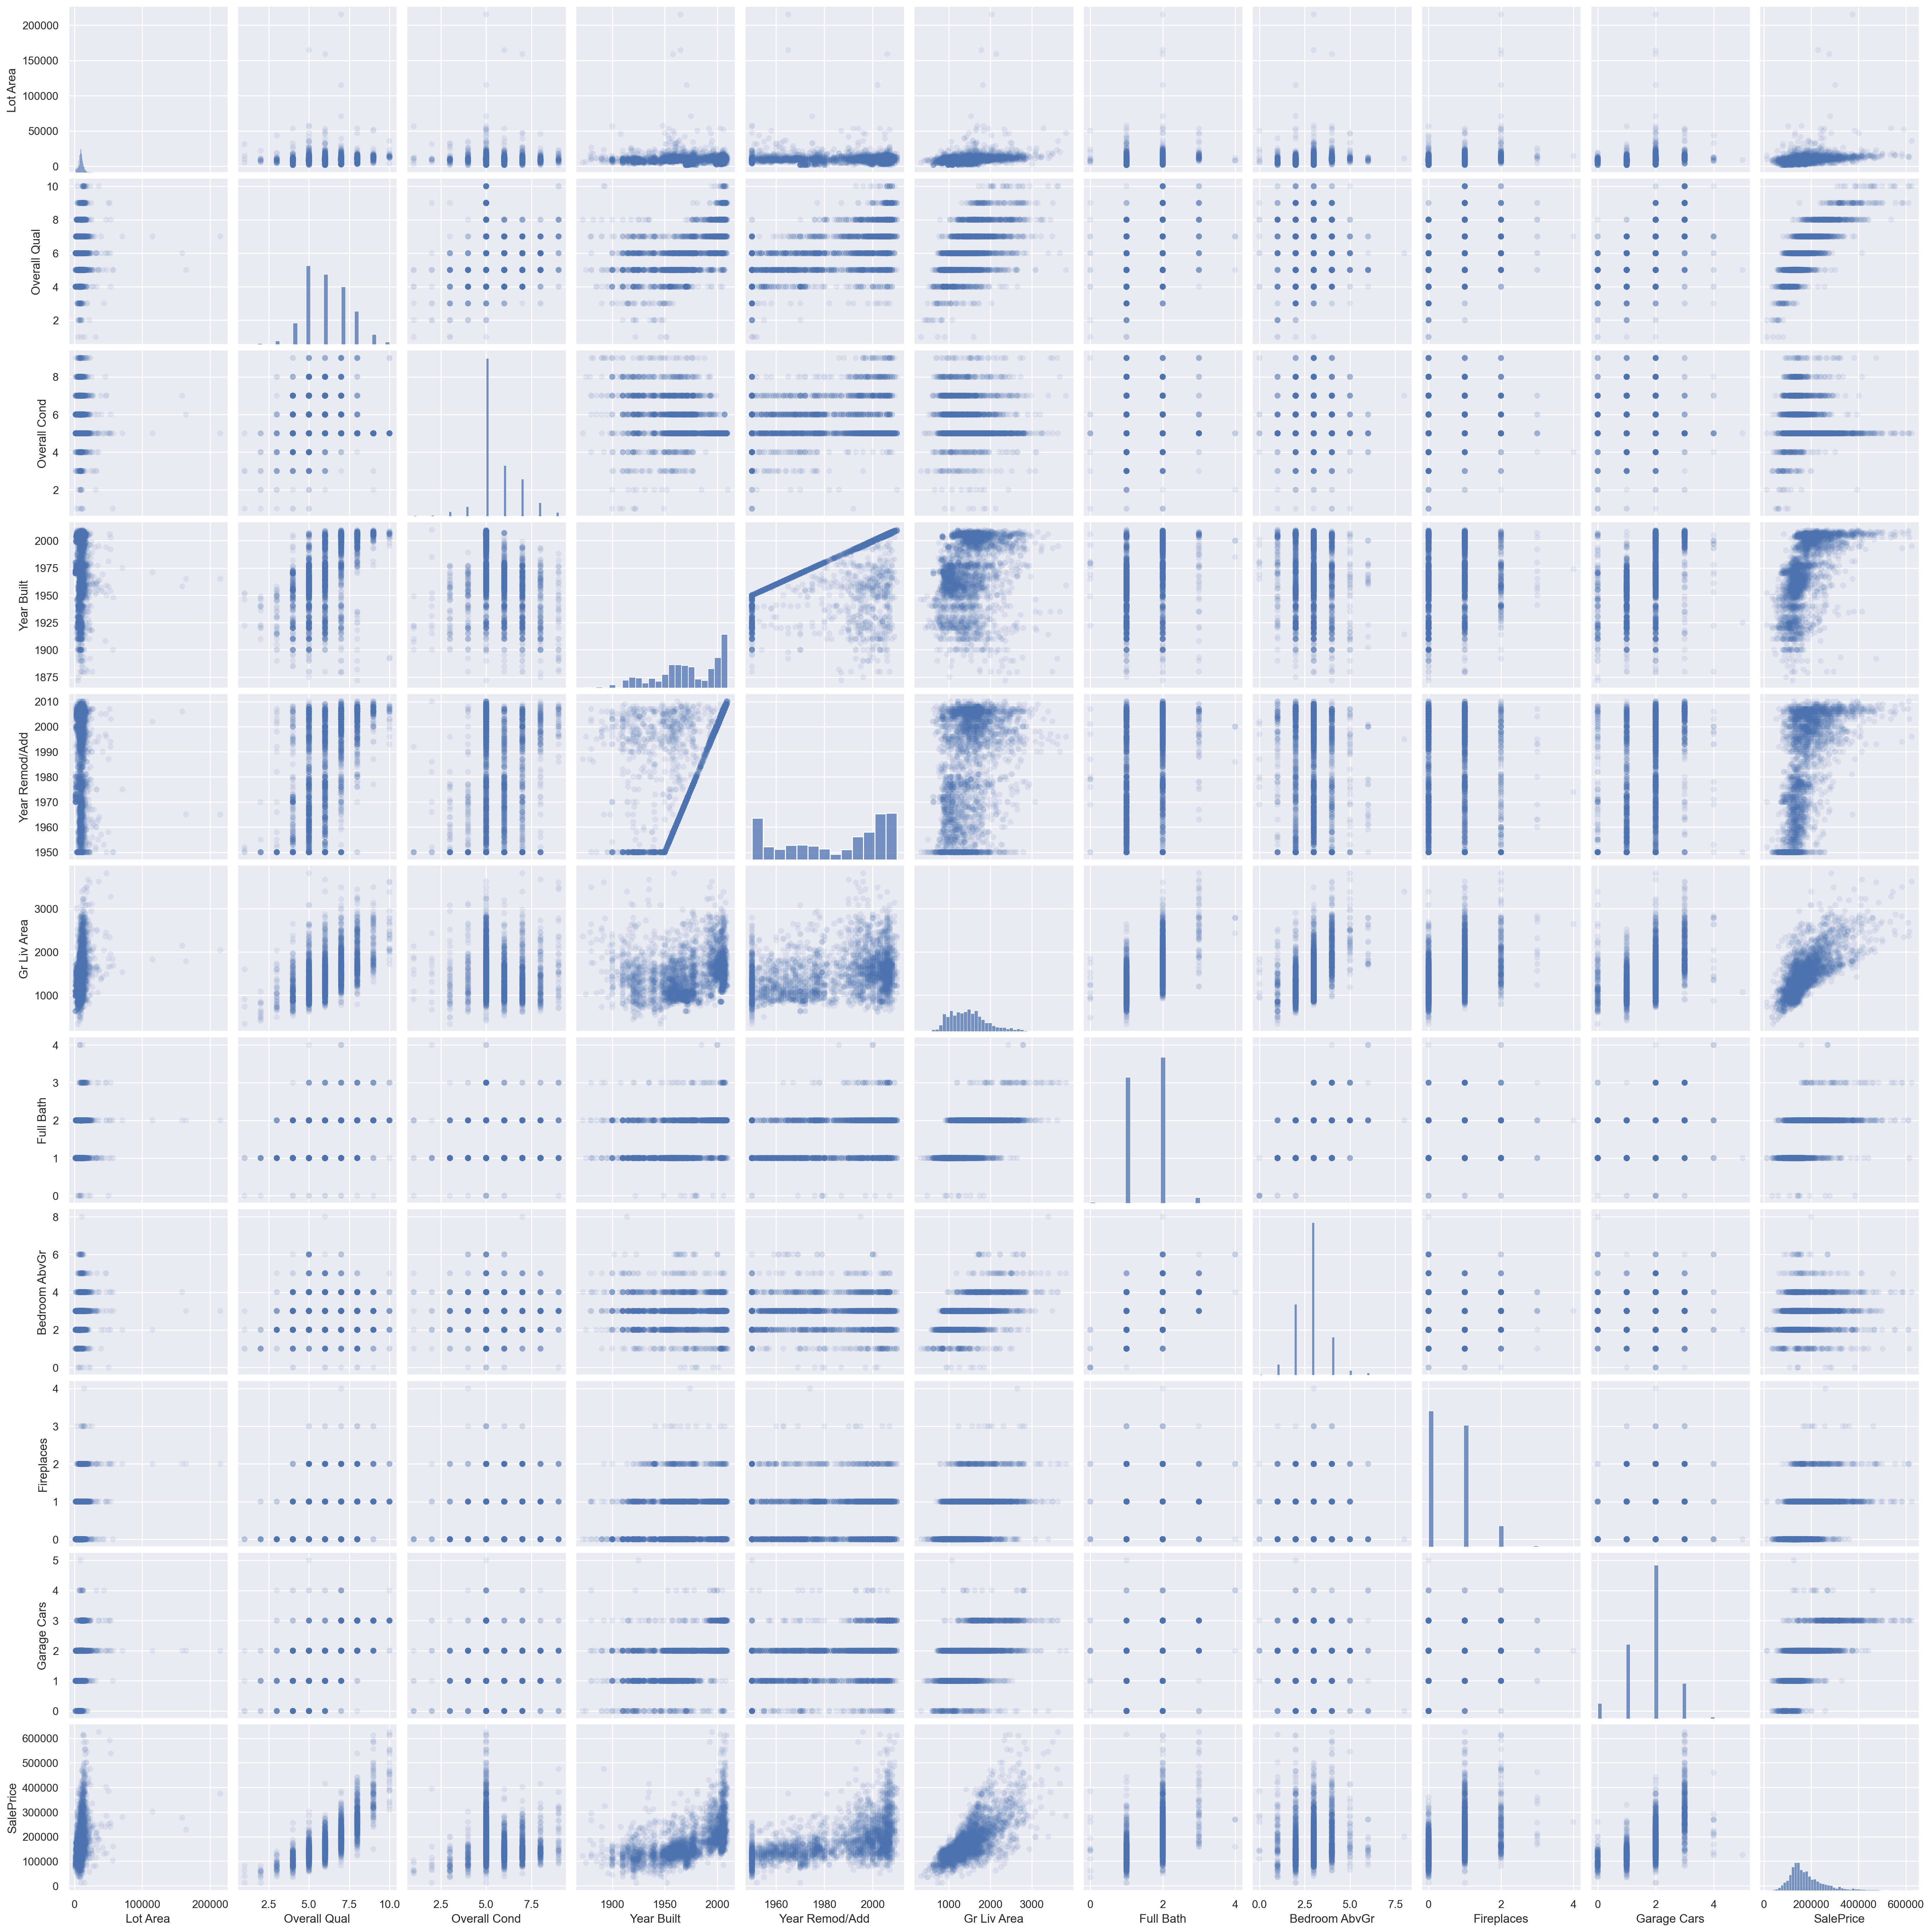

In [19]:
sns.pairplot(smaller_df, plot_kws=dict(alpha= .1, edgecolor= 'none'))

In [20]:
X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
                       'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                       'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                       'Garage Cars']]

y = smaller_df['SalePrice']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2926 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 251.5 KB


In [22]:
X2 = X.copy()

In [23]:
X2['OQ2'] = X2['Overall Qual']**2
X2['GLA2'] = X2['Gr Liv Area']**2

In [25]:
X3 = X2.copy()

X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']
X3['OQ_/_LA'] = X3['Overall Qual'] * X3['Lot Area']

In [26]:
data['House Style'].value_counts()

House Style
1Story    1481
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [27]:
pd.get_dummies(df['House Style'], drop_first=True).head()

1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer   SLvl
0   False    True   False   False   False   False  False
1   False    True   False   False   False   False  False
2   False    True   False   False   False   False  False
3   False    True   False   False   False   False  False
4   False    True   False   False   False   False  False

In [28]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

Neighborhood
NAmes      444
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [29]:
other_nbh = list(nbh_counts[nbh_counts<= 8].index)

In [31]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbh, 'Other')

In [33]:
def add_deviation_feature(X, feature, category):
    
    category_gb = X.groupby(category)[feature]

    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())

    deviaton_feature = (X[feature] - category_mean) / category_std
    X[feature+ '_Dev_' +category] = deviaton_feature

In [35]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
pf = PolynomialFeatures(degree=2)

In [38]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()